![Alt text](https://www.retently.com/wp-content/uploads/2018/08/Airline-satisfaction-cover-1-1536x590.png)

## Introduction
In this activity, We will complete an effective bionomial logistic regression. This exercise will help us better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help us build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help us expand out skill set in a widely-applicable way.

For this activity, I work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Our goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, We will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model
* Evaluating a binomial logistic regression model using a confusion matrix

# Step 1 : Imports

## import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics`to build, visualize, and evalute the model.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## Load dataset

The dataset `Invistico_Airline.csv` is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do need to download the .csv file before, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
df_original = pd.read_csv(r"C:\Users\Badr\Desktop\DA & DS in Python\Introduction to Hypothesis Testing in Python\Invistico_Airline.csv")
df_original.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


# Step 2: Data exploration, data cleaning, and model preparation

Prepare the data
After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes:

* Exploring the data
* Checking for missing values
* Encoding the data
* Renaming a column
* Creating the training and testing data

## Explore the data
Check the data type of each column. Note that logistic regression models expect numeric data.

In [4]:
df_original.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

## Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.



**Question**: How many satisfied and dissatisfied customers were there?

In [6]:
df_original['satisfaction'].value_counts(dropna=True)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

**Answer** : There was 71,087 satisfied customers, and 58,793 dissatisfied.

**Question**: What percentage of customers were satisfied?

In [8]:
df_original['satisfaction'].value_counts(normalize=True)*100

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

**Answer :** 54.73% of the customers are satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy.

## Checking for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [9]:
df_original.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the inflight entertainment column?

In [11]:
df_original['Arrival Delay in Minutes'].isnull().sum()/len(df_original) * 100

0.3025870033877425

 For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The Arrival Delay in Minutes column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

* There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total (0.3%).
* This column might impact the relationship between entertainment and satisfaction.

## Drop the rows with missing values
We're going to drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [12]:
df_subset = df_original.dropna().reset_index(drop= True)

## Prepare the data

If we want to create a plot (sns.regplot) of our model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object."

Make the `Inflight entertainment` column "of type float."

In [14]:
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)
df_subset.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment               float64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

## Convert the categorical column `satisfaction`  into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding. For that we use `OneHotEncoder()` from `sklearn.preprocessing`. 

We call `OneHotEncoder()`, specifying the drop argument as `'first'` in order to remove redundant columns from the output. 

After that, we call `.fit_transform()`, passing in the subset of the data that we want to encode (the subset consisting of satisfaction).

Finally, we call `.toarray()` in order to convert the sparse matrix that `.fit_transform()` returns into an array.

In [16]:
df_subset.satisfaction.unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [17]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

In [18]:
df_subset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [19]:
# Independent variable X:
X = df_subset[['Inflight entertainment']]

# Dependent variable y:
y = df_subset[['satisfaction']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

**Question :** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment`  as your sole independent variable?

**Answer :** Other variables, like `Departure Delay in Minutes` seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal.

# Step 3: Model building

## Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data.

In [24]:
# Build the logistic regression model:
clf = LogisticRegression().fit(X_train, y_train) #classifier

C:\Users\Badr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Classifier's coefficients and intercept attributes, to get the parameters estimates:
clf.coef_

array([[0.99751462]])

In [26]:
clf.intercept_

array([-3.19355406])

## Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

In [27]:
df_subset.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

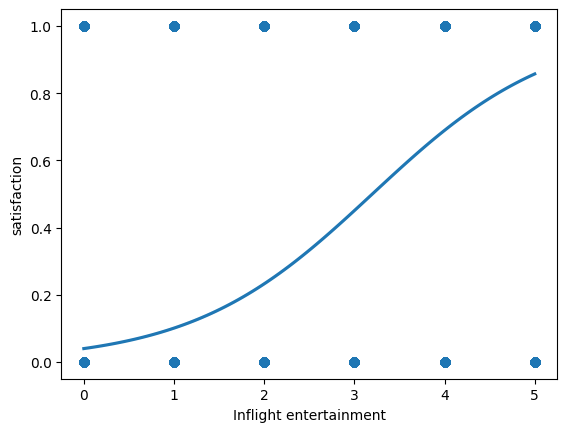

In [28]:
sns.regplot(x="Inflight entertainment", y= "satisfaction", data = df_subset, logistic= True);

**Question :** What can you tell from the graph?

**Answer :** The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

# Step 4 : Results and evaluation

## Predict the outcome for the test dataset

Now that We've completed our regression, review and analyze our results. First, we input the holdout dataset into the `predict` function to get the predicted labels from the model, and save these predictions as a variable called `y_pred`.

In [35]:
# Save the predictions
y_pred = clf.predict(X_test)

# examine the predictions
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


`clf.predict` outputs an array of 0's and 1's, where 0's are satisfied and 1's are not satisfied.

## Use the `predict_proba` and `predict`  functions on `X_test`

Using the `predict_proba` function on `X_test` will produce the probability that each observation is a 0 or 1.

In [37]:
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

## Analyze the results

Print out the model's accuracy, precision, recall, and F1 score. For that, we use four different functions from `metrics` to get these metrics.

We nput `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score`, and `metrics.f1_score` functions.

In [38]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


## Produce a confusion matrix
Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

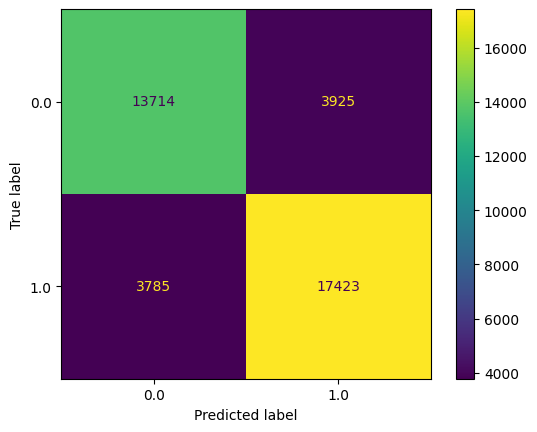

In [39]:
cm = metrics.confusion_matrix(y_test,y_pred,labels = clf.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

**Question :** What stands out to you about the confusion matrix?

**Answer :** 

* Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.

* Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Question :** Did you notice any difference in the number of false positives or false negatives that the model produced?

**Answer :** There isn't a large difference in the number of false positives and false negatives.

**Question :** What do you think could be done to improve model performance?

**Answer :** 

* Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like `Departure Delay in Minutes`, seem like they could potentially influence customer satisfaction.

## Considerations

#### What are some key takeaways that you learned from this lab?

A lot of machine learning workflows are about cleaning, encoding, and scaling data. The approach you use to plot or graph your data may depend on the type of variable you are evaluating. Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

#### What findings would you share with others?

Logistic regression accurately predicted satisfaction 80.2 percent of the time. The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.

#### What would you recommend to stakeholders?

Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. The model is 80.2% accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7%. The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.